In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
col = data[['R&D Spend','Marketing Spend']]
data['AVG'] = col.mean(axis=1)
data.drop(['R&D Spend','Marketing Spend'],axis=1,inplace=True)
data = data[['AVG','Administration','State','Profit']]

In [4]:
data.head()

,AVG,Administration,State,Profit
0,318566.650,136897.80,New York,192261.83
1,303248.115,151377.59,California,191792.06
2,280688.025,101145.55,Florida,191050.39
3,263786.015,118671.85,New York,182901.99
4,254137.880,91391.77,Florida,166187.94


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

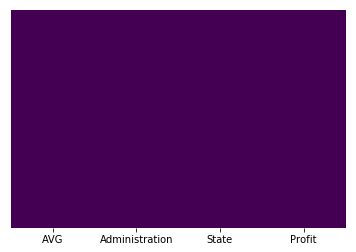

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar = False,cmap='viridis' )

In [7]:
data.corr()

,AVG,Administration,Profit
AVG,1.000000,0.045199,0.857488
Administration,0.045199,1.000000,0.200717
Profit,0.857488,0.200717,1.000000


In [8]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 2] = labelencoder_X.fit_transform(X.iloc[:, 2])

In [9]:
# making dummy variables
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()

c:\users\dell\py4e\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\dell\py4e\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
pd.DataFrame(X)

,0,1,2,3,4
0,0.0,0.0,1.0,318566.650,136897.80
1,1.0,0.0,0.0,303248.115,151377.59
2,0.0,1.0,0.0,280688.025,101145.55
3,0.0,0.0,1.0,263786.015,118671.85
4,0.0,1.0,0.0,254137.880,91391.77
5,0.0,0.0,1.0,247369.130,99814.71
6,1.0,0.0,0.0,131166.140,147198.87
7,0.0,1.0,0.0,227087.405,145530.06
8,0.0,0.0,1.0,216077.905,148718.95
9,1.0,0.0,0.0,214158.250,108679.17


In [11]:
X = X[:, 1:] # avoiding the dummy variable trap

In [12]:
pd.DataFrame(X)

,0,1,2,3
0,0.0,1.0,318566.650,136897.80
1,0.0,0.0,303248.115,151377.59
2,1.0,0.0,280688.025,101145.55
3,0.0,1.0,263786.015,118671.85
4,1.0,0.0,254137.880,91391.77
5,0.0,1.0,247369.130,99814.71
6,0.0,0.0,131166.140,147198.87
7,1.0,0.0,227087.405,145530.06
8,0.0,1.0,216077.905,148718.95
9,0.0,0.0,214158.250,108679.17


In [13]:
# Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

**K-fold Cross validation**

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor,X = X_train,y = y_train, cv=10)
print(accuracies.mean())
print(accuracies.std()) # less std means the result is not all over the place

0.6085308251888918
0.3306374510139993


c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


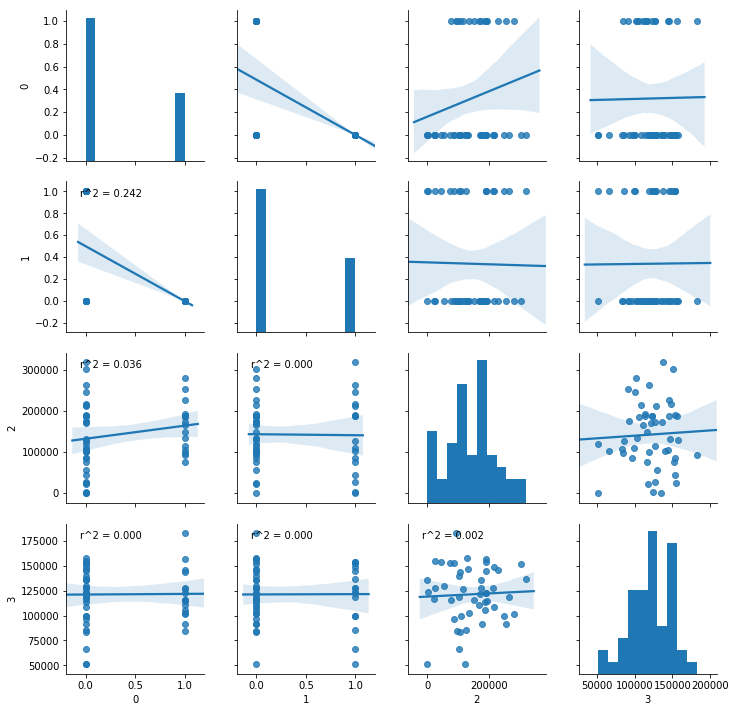

In [16]:
def r_squared(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r^2 = {:.3f}".format(r**2),
                xy=(.1, .9), xycoords=ax.transAxes)

# Check for Linearity visually
linearity_assumption_plot_1 = sns.pairplot(pd.DataFrame(X), kind="reg")
linearity_assumption_plot_1.map_lower(r_squared)

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


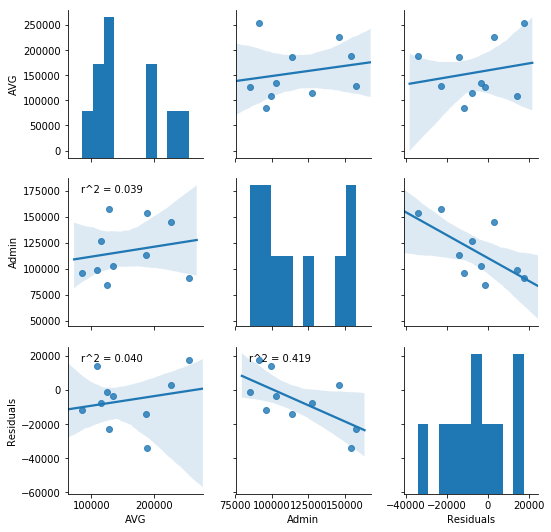

In [17]:
error_residual = pd.DataFrame(y_test-y_pred)
error_residual.reset_index(inplace = True)
linearity_test_df = pd.DataFrame(X_test)
linearity_test_df['Residual'] = error_residual['Profit']
linearity_test_df.columns = 'S1 S2 AVG Admin Residuals'.split()

linearity_assumption_plot_2 = sns.pairplot(linearity_test_df.iloc[:, 2:], kind="reg")
linearity_assumption_plot_2.map_lower(r_squared)

In [18]:
endogenity_check = linearity_test_df.corr() # Check only the reciduals row with other data
endogenity_check

,S1,S2,AVG,Admin,Residuals
S1,1.000000,-0.534522,0.420724,-0.016907,0.463671
S2,-0.534522,1.000000,-0.179812,-0.117357,-0.049877
AVG,0.420724,-0.179812,1.000000,0.197428,0.199091
Admin,-0.016907,-0.117357,0.197428,1.000000,-0.647091
Residuals,0.463671,-0.049877,0.199091,-0.647091,1.000000


**Homoscedecity**

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


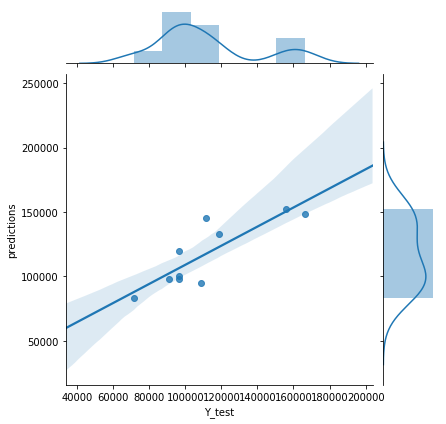

In [19]:
residual_test = np.column_stack([y_test,y_pred])
residual_test = pd.DataFrame(residual_test)
residual_test.columns='Y_test predictions'.split()
sns.jointplot(x='Y_test', y='predictions', data=residual_test, kind='reg')

In [20]:
residual_test

,Y_test,predictions
0,108552.04,94588.979776
1,155752.60,152576.765694
2,96712.80,119762.493382
3,90708.19,98290.792072
4,71498.49,83135.202686
5,118474.03,132589.786315
6,96479.51,97815.639472
7,166187.94,148534.577575
8,96778.92,100062.293314
9,111313.02,145489.616208


In [21]:
stats.levene(residual_test['Y_test'], residual_test['predictions']) # check p value > threshold(0.05), levene test for homoscedecity passed 

LeveneResult(statistic=0.04656361229909024, pvalue=0.8315808939259656)

__Normality Test for normality__

In [22]:
stats.shapiro(error_residual['Profit'])

(0.9814402461051941, 0.9724068641662598)

**Feature Selection**

In [23]:
#the coefficients
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [-6.53736269e+03  5.33269002e+02  4.35722918e-01  2.92375323e-01]


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("Variance score: {}".format(r2_score(y_test, y_pred)))


Mean squared error: 262075156.76162663
Variance score: 0.6596066809426215


In [25]:
# Building the optimal model using Backward Elimination
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(X)

In [26]:
pd.DataFrame(x)

,0,1,2,3,4
0,1.0,0.0,1.0,318566.650,136897.80
1,1.0,0.0,0.0,303248.115,151377.59
2,1.0,1.0,0.0,280688.025,101145.55
3,1.0,0.0,1.0,263786.015,118671.85
4,1.0,1.0,0.0,254137.880,91391.77
5,1.0,0.0,1.0,247369.130,99814.71
6,1.0,0.0,0.0,131166.140,147198.87
7,1.0,1.0,0.0,227087.405,145530.06
8,1.0,0.0,1.0,216077.905,148718.95
9,1.0,0.0,0.0,214158.250,108679.17


In [27]:
x = pd.DataFrame(x, columns = 'Const S1 S2 AVG Administration'.split())
x

,Const,S1,S2,AVG,Administration
0,1.0,0.0,1.0,318566.650,136897.80
1,1.0,0.0,0.0,303248.115,151377.59
2,1.0,1.0,0.0,280688.025,101145.55
3,1.0,0.0,1.0,263786.015,118671.85
4,1.0,1.0,0.0,254137.880,91391.77
5,1.0,0.0,1.0,247369.130,99814.71
6,1.0,0.0,0.0,131166.140,147198.87
7,1.0,1.0,0.0,227087.405,145530.06
8,1.0,0.0,1.0,216077.905,148718.95
9,1.0,0.0,0.0,214158.250,108679.17


In [28]:
X_opt = x.loc[:, ['Const', 'S1', 'S2', 'AVG', 'Administration']]
X_opt

,Const,S1,S2,AVG,Administration
0,1.0,0.0,1.0,318566.650,136897.80
1,1.0,0.0,0.0,303248.115,151377.59
2,1.0,1.0,0.0,280688.025,101145.55
3,1.0,0.0,1.0,263786.015,118671.85
4,1.0,1.0,0.0,254137.880,91391.77
5,1.0,0.0,1.0,247369.130,99814.71
6,1.0,0.0,0.0,131166.140,147198.87
7,1.0,1.0,0.0,227087.405,145530.06
8,1.0,0.0,1.0,216077.905,148718.95
9,1.0,0.0,0.0,214158.250,108679.17


In [29]:
# Fit the model, according to the OLS (ordinary least squares)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [30]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     36.48
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.38e-13
Time:                        19:44:18   Log-Likelihood:                -564.53
No. Observations:                  50   AIC:                             1139.
Df Residuals:                      45   BIC:                             1149.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           2.193e+04   1.41e+04      1.552      0.128   -6521.449    5.04e+04
S1             -2966.5689   7273.203     -0.408      0.685   -1.76e+04    1.17e+04
S2              2190.6324   7033.869      0.311      0.757    -1.2e+04    1.64e+04
AVG                0.4353      0.038     11.569      0.000       0.360       0.511
Administration     0.2333      0.104      2.239      0.030       0.023       0.443
==============================================================================
Omnibus:                        6.909   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.105
Skew:                          -0.520   Prob(JB):                       0.0287
Kurtosis:                       4.526   Cond. No.                     9.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_opt = x.loc[:, ['Const', 'S1', 'AVG', 'Administration']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     49.58
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.87e-14
Time:                        19:44:18   Log-Likelihood:                -564.58
No. Observations:                  50   AIC:                             1137.
Df Residuals:                      46   BIC:                             1145.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           2.285e+04   1.37e+04      1.671      0.102   -4674.388    5.04e+04
S1             -4096.1245   6242.199     -0.656      0.515   -1.67e+04    8468.770
AVG                0.4364      0.037     11.762      0.000       0.362       0.511
Administration     0.2336      0.103      2.264      0.028       0.026       0.441
==============================================================================
Omnibus:                        6.868   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.007
Skew:                          -0.521   Prob(JB):                       0.0301
Kurtosis:                       4.509   Cond. No.                     9.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# The model is the best
X_opt = x.loc[:, ['Const', 'AVG', 'Administration']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     75.06
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           2.33e-15
Time:                        19:44:18   Log-Likelihood:                -564.81
No. Observations:                  50   AIC:                             1136.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           2.221e+04   1.36e+04      1.638      0.108   -5061.936    4.95e+04
AVG                0.4318      0.036     11.924      0.000       0.359       0.505
Administration     0.2335      0.103      2.276      0.027       0.027       0.440
==============================================================================
Omnibus:                        7.972   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.998
Skew:                          -0.560   Prob(JB):                       0.0111
Kurtosis:                       4.751   Cond. No.                     9.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X_opt = x.loc[:, ['Administration', 'AVG']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     821.6
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           7.46e-38
Time:                        19:44:18   Log-Likelihood:                -566.20
No. Observations:                  50   AIC:                             1136.
Df Residuals:                      48   BIC:                             1140.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Administration     0.3849      0.045      8.499      0.000       0.294       0.476
AVG                0.4519      0.035     13.037      0.000       0.382       0.522
==============================================================================
Omnibus:                        6.127   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                5.261
Skew:                          -0.580   Prob(JB):                       0.0721
Kurtosis:                       4.087   Cond. No.                         3.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print(regressor.coef_)

[-6.53736269e+03  5.33269002e+02  4.35722918e-01  2.92375323e-01]


In [35]:
X_opt = x.loc[:, ['Const', 'AVG']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.86e-15
Time:                        19:44:19   Log-Likelihood:                -567.43
No. Observations:                  50   AIC:                             1139.
Df Residuals:                      48   BIC:                             1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const       5.001e+04   6133.125      8.154      0.000    3.77e+04    6.23e+04
AVG            0.4355      0.038     11.547      0.000       0.360       0.511
==============================================================================
Omnibus:                        5.722   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                6.492
Skew:                          -0.320   Prob(JB):                       0.0389
Kurtosis:                       4.645   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X_opt = x.loc[:, ['Const','Administration']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 06 Apr 2019   Prob (F-statistic):              0.162
Time:                        19:44:19   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Const           7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
print('Coefficients:',regressor.coef_)

Coefficients: [-6.53736269e+03  5.33269002e+02  4.35722918e-01  2.92375323e-01]


## Inferences
- 1 unit increase in 'AVG Spend'(R&D and Marketing Spend) increases the profit by 0.4318 units
- 1 unit increase in 'Adminstration Spend' increases the profit by 0.2335 units.